In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
##Load the dataset
df = pd.read_csv('C:\\Datascience study\\Projects\\ML End to end\\Notebook\\data\\stud.csv')


In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Assuming
Here we are taking math_score as a dependent feature
- using all other features we are going to predict the math_score of the student


In [6]:
x=df.drop(columns='math_score',axis=1)

In [7]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [9]:
y=df['math_score']

In [10]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [11]:
num_features=x.select_dtypes(include="integer").columns
cat_features=x.select_dtypes(include="object").columns
print(f"\n numfeatures are {num_features} ,\ncat_features are {cat_features}") 



 numfeatures are Index(['reading_score', 'writing_score'], dtype='object') ,
cat_features are Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [12]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

oh_transformer=OneHotEncoder()
numeric_transformer=StandardScaler()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScale",numeric_transformer,num_features),
    ]
)

In [13]:
x=preprocessor.fit_transform(x)

In [14]:
x


array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [15]:
x.shape

(1000, 19)

In [16]:
##Split the train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 19), (800,), (200, 19), (200,))

In [17]:
def evaluate_mode(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    r2_square=r2_score(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    return mae,rmse,r2_square
    

In [21]:
models= {
    "LinearRegression" : LinearRegression(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "k-Neighbour Regressor":KNeighborsRegressor(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False)
    
}

model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    #print(model)
    model.fit(x_train,y_train)
    
    #predicting the model
    y_train_predicted=model.predict(x_train)
    y_test_predicted=model.predict(x_test)
    
    
    #evaluating the train nd test data
    #train_accuracy = model.score(y_train,y_train_predicted)
    modeltrain_mae,modeltrain_rmse,modeltrain_r2_score=evaluate_mode(y_train,y_train_predicted)
    
    modeltest_mae,modeltest_rmse,modeltest_r2=evaluate_mode(y_test,y_test_predicted)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(modeltrain_rmse))
    print("- Mean Absolute Error: {:.4f}".format(modeltrain_mae))
    print("- R2 Score: {:.4f}".format(modeltrain_r2_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(modeltest_rmse))
    print("- Mean Absolute Error: {:.4f}".format(modeltest_mae))
    print("- R2 Score: {:.4f}".format(modeltest_r2))
    r2_list.append(modeltest_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2674
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3954
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


DecisionTreeRegressor
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.0917
- Mean Absolute Error: 6.3250
- R2 Score: 0.7309


RandomForestRegressor
Model performance for Training set
- Root Mean Squared Error: 2.3152
- Mean Absolute Error: 1.8425
- R2 Score: 0.9762
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0505
- Mean Absolute Error: 4.6636
- R2 Score: 0.8496


AdaBoostRegressor
Model performance for Training set
- Root Mean Squared Error: 5.7340
- Mean Absolute Error: 4.6669
- R2 Score: 0.8

In [22]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,Ridge,0.880593
0,LinearRegression,0.880369
3,AdaBoostRegressor,0.856705
8,CatBoostRegressor,0.851632
2,RandomForestRegressor,0.849557
7,XGBRegressor,0.827797
5,Lasso,0.825320
4,k-Neighbour Regressor,0.783813
1,DecisionTreeRegressor,0.730930


## Linear regression


In [23]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


## Plot ytest and y pred

Text(0, 0.5, 'predicted')

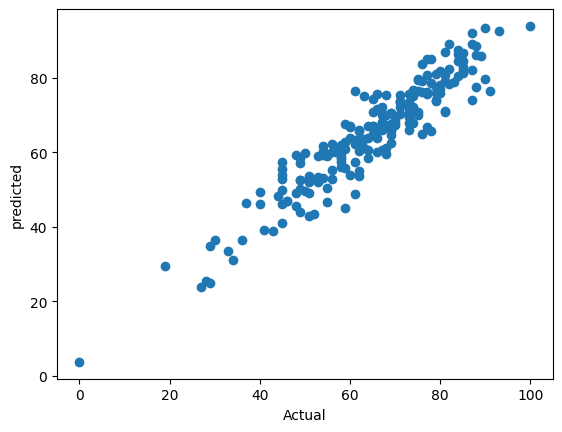

In [27]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")

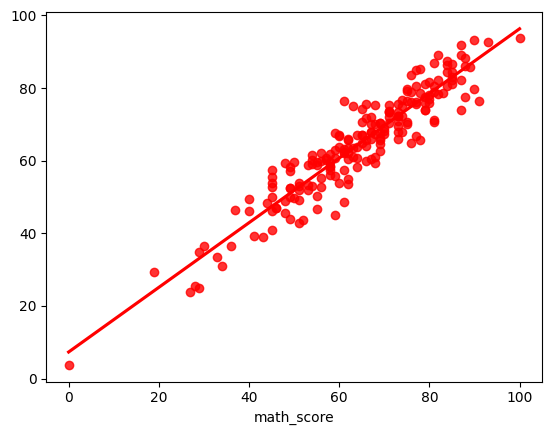

In [28]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## differences between actual and predicted values

In [29]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.945312,-5.945312
740,80,76.953125,3.046875
660,74,76.757812,-2.757812
411,84,87.531250,-3.531250
...,...,...,...
408,52,43.539062,8.460938
332,62,62.015625,-0.015625
208,74,67.960938,6.039062
613,65,67.125000,-2.125000
